In [27]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


In [28]:
from matplotlib import pyplot as plt
import seaborn as sns
wine = pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In the beginning, we want to split our train and test data so that any insights unintentionally gained on the test data do not corrupt lead us to overfit our model and tune it to enhance our test set accuracy.

In [29]:
from sklearn.model_selection import train_test_split
X = wine.drop(columns = ['quality'])
y = wine['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) #two thirds training and one-thirds testing

In [ ]:
X_train.isnull().values.any() #No null values to proceed to the exploratory data analysis phase.

# Exploratory Data Analysis Phase

Let's examine the distribution of fixed_acidity. 

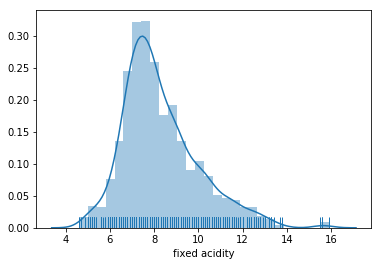

In [30]:
sns.distplot(X_train['fixed acidity'], kde = True, rug = True)

The distribution of fixed acidity appears to be unimodal and skewed to the right(skewed towards higher numbers of fixed acidity). Since this distribution isn't roughly symmetric, it will be more appropriate to use the median of this distribution to replace null and zero values, as the mean is pulled in the direction of the tail.

In [31]:
X_train['fixed acidity'].describe()

count    1071.000000
mean        8.303455
std         1.707197
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000
Name: fixed acidity, dtype: float64

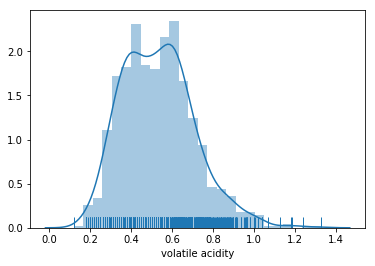

In [32]:
sns.distplot(X_train['volatile acidity'], kde = True, rug = True)

The distribution of volatile acidity appears to be bimodal and roughly symmetric. Since this distribution roughly symmetric, it is appropriate to use the mean of this distribution to replace null and zero values.

In [33]:
X_train['volatile acidity'].describe()

count    1071.000000
mean        0.532465
std         0.177055
min         0.120000
25%         0.400000
50%         0.520000
75%         0.640000
max         1.330000
Name: volatile acidity, dtype: float64

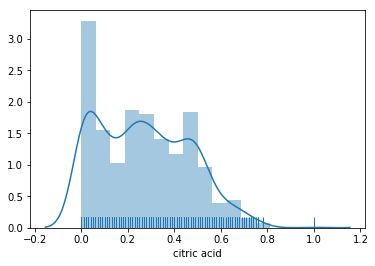

In [34]:
sns.distplot(X_train['citric acid'], kde = True, rug = True)

The distribution of citric acid appears to be unimodal and skewed to the right(skewed towards higher numbers of citric acid). Since this distribution isn't roughly symmetric, it will be more appropriate to use the median of this distribution to replace null and zero values, as the mean is pulled in the direction of the tail.

Particularly, there appears to be many wines that do not have citric acid(as there are values of 0.0). However, since these citric acid values are quite small in the 0.0 to 0.8 range mostly, it is quite likely that these values are not null and/or outlier values.

In [35]:
X_train['citric acid'].describe()

count    1071.000000
mean        0.269337
std         0.195814
min         0.000000
25%         0.090000
50%         0.260000
75%         0.430000
max         1.000000
Name: citric acid, dtype: float64

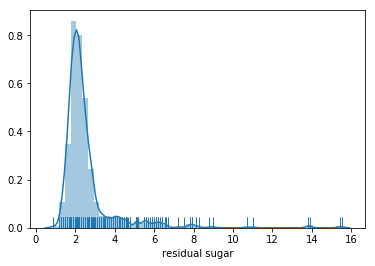

In [36]:
sns.distplot(X_train['residual sugar'], kde = True, rug = True)

The distribution of residual sugar appears to be unimodal and roughly symmetric. Since this distribution roughly symmetric, it is appropriate to use the mean of this distribution to replace null and zero values. Particularly, the majority of wines have residual sugar values that are relatively similar in the 1-3 range, even though there are a couple of outliers a couple times larger as outlined by the rug plot.

In [37]:
X_train['residual sugar'].describe()

count    1071.000000
mean        2.546919
std         1.407782
min         0.900000
25%         1.900000
50%         2.200000
75%         2.600000
max        15.500000
Name: residual sugar, dtype: float64

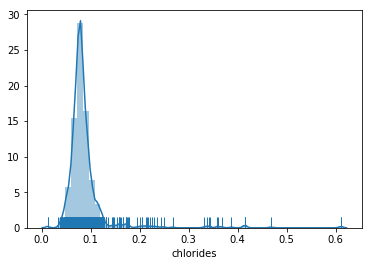

In [38]:
sns.distplot(X_train['chlorides'], kde = True, rug = True)

The distribution of chlorides appears to be unimodal and roughly symmetric. Since this distribution roughly symmetric, it is appropriate to use the mean of this distribution to replace null and zero values. Particularly, the majority of wines have residual sugar values that are relatively similar in the 0.02 to 0.12 range, even though there are a couple of outliers a couple times larger as outlined by the rug plot(like a wine with chlorides of 0.6 for example).

In [45]:
X_train['chlorides'].describe()

count    1071.000000
mean        0.087727
std         0.047312
min         0.012000
25%         0.071000
50%         0.080000
75%         0.090000
max         0.611000
Name: chlorides, dtype: float64

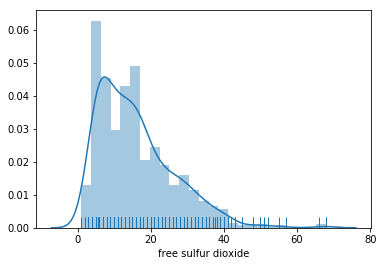

In [39]:
sns.distplot(X_train['free sulfur dioxide'], kde = True, rug = True)

The distribution of free sulfur dioxide appears to be unimodal and skewed to the right(skewed towards higher numbers of free sulfur dioxide). Since this distribution isn't roughly symmetric, it will be more appropriate to use the median of this distribution to replace null and zero values, as the mean is pulled in the direction of the tail.

In [46]:
X_train['free sulfur dioxide'].describe()

count    1071.000000
mean       15.912232
std        10.287787
min         1.000000
25%         7.000000
50%        14.000000
75%        21.000000
max        68.000000
Name: free sulfur dioxide, dtype: float64

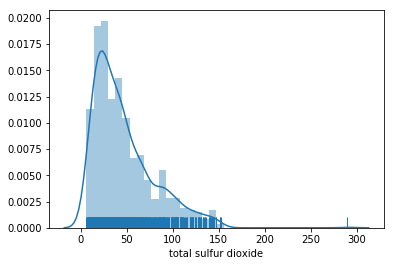

In [40]:
sns.distplot(X_train['total sulfur dioxide'], kde = True, rug = True)

The distribution of total sulfur dioxide appears to be bimodal and skewed to the right(skewed towards higher numbers of citric acid). Since this distribution isn't roughly symmetric, it will be more appropriate to use the median of this distribution to replace null and zero values, as the mean is pulled in the direction of the tail.

In [47]:
X_train['total sulfur dioxide'].describe()

count    1071.000000
mean       46.763305
std        32.994509
min         6.000000
25%        22.000000
50%        38.000000
75%        63.000000
max       289.000000
Name: total sulfur dioxide, dtype: float64

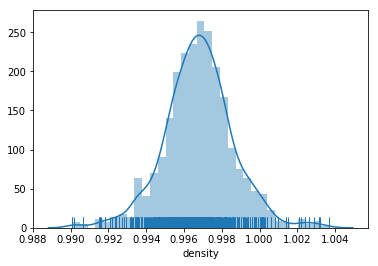

In [41]:
sns.distplot(X_train['density'], kde = True, rug = True)

The distribution of density appears to be unimodal and roughly symmetric. Since this distribution roughly symmetric, it is appropriate to use the mean of this distribution to replace null and zero values.

In [48]:
X_train['density'].describe()

count    1071.000000
mean        0.996779
std         0.001843
min         0.990070
25%         0.995695
50%         0.996800
75%         0.997830
max         1.003690
Name: density, dtype: float64

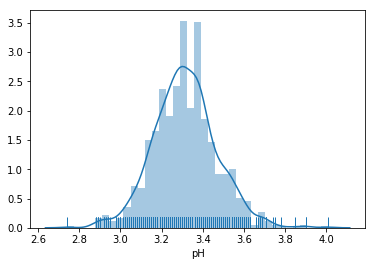

In [42]:
sns.distplot(X_train['pH'], kde = True, rug = True)

The distribution of pH appears to be bimodal and roughly symmetric. Since this distribution roughly symmetric, it is appropriate to use the mean of this distribution to replace null and zero values.

In [49]:
X_train['pH'].describe()

count    1071.000000
mean        3.314538
std         0.154349
min         2.740000
25%         3.220000
50%         3.310000
75%         3.400000
max         4.010000
Name: pH, dtype: float64

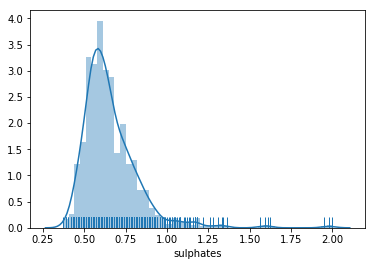

In [43]:
sns.distplot(X_train['sulphates'], kde = True, rug = True)

The distribution of sulphates appears to be bimodal and slightly skewed to the right(skewed towards higher numbers of sulphates). Since this distribution isn't roughly symmetric, it will be more appropriate to use the median of this distribution to replace null and zero values, as the mean is pulled in the direction of the tail.

In [50]:
X_train['sulphates'].describe()

count    1071.000000
mean        0.658814
std         0.173023
min         0.370000
25%         0.550000
50%         0.620000
75%         0.730000
max         2.000000
Name: sulphates, dtype: float64

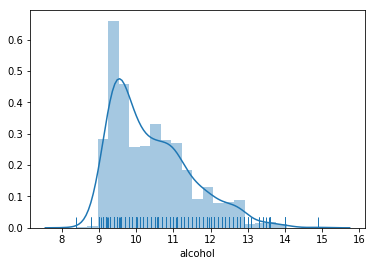

In [44]:
sns.distplot(X_train['alcohol'], kde = True, rug = True)

The distribution of alcohol appears to be bimodal and skewed to the right(skewed towards higher numbers of alcohol). Since this distribution isn't roughly symmetric, it will be more appropriate to use the median of this distribution to replace null and zero values, as the mean is pulled in the direction of the tail.

In [51]:
X_train['alcohol'].describe()

count    1071.000000
mean       10.415219
std         1.063407
min         8.400000
25%         9.500000
50%        10.200000
75%        11.000000
max        14.900000
Name: alcohol, dtype: float64

# Model Development Phase

In [60]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
model.coef_

array([ 1.91482708e-02, -1.04879349e+00, -2.05059436e-01,  1.84280865e-02,
       -1.71727378e+00,  3.14508676e-03, -3.00515039e-03, -2.07241572e+01,
       -3.26748948e-01,  7.89183448e-01,  2.88943124e-01])

It doesn't appear that any of these coeffients are not contributing to the prediction of the rating. However, two coefficients seem quite low in value. Particularly, the 3.14508676e-03 and -3.00515039e-03 values.

In [64]:
def mean_squared_error(actual, predicted):
    return np.mean((actual-predicted)**2)

In [97]:
actual = y_test
predicted = model.predict(X_test)
mse_1 = mean_squared_error(actual, predicted)
mse_1

0.4242040899801839

With a mean squared error of 0.4242040899801839, this error seems quite small. However, is it small relative to other errors for other forms of linear regression. Could Ridge Regression more effectively capture nonlinearity of the points on the scatterplot?

In [98]:
from sklearn.linear_model import Ridge
model2 = Ridge()
model2.fit(X_train, y_train)
model2.coef_

array([ 0.00527468, -1.06401552, -0.21653986,  0.00740719, -1.09107843,
        0.00339007, -0.00296794, -0.01600073, -0.3562811 ,  0.67560346,
        0.31381541])

In [99]:
actual = y_test
predicted = model2.predict(X_test)
mse_2 = mean_squared_error(actual, predicted)
mse_2

0.4266339642743729

With a mean squared error of 0.4242040899801839, this error seems quite small, very similar to the regular least squares regression approach, only slighly higher.

In [89]:
from sklearn import linear_model
model3 = linear_model.Lasso(alpha=0.0001)
model3.fit(X_train, y_train)
model3.coef_ #In this case, many coefficent values are 0, so they aren't contributing anything to prediction magnitudinally.

array([ 2.58254449e-04, -1.05967290e+00, -1.99449645e-01,  8.94898370e-03,
       -1.68264489e+00,  3.38726665e-03, -3.05531766e-03, -0.00000000e+00,
       -4.17873603e-01,  7.50628725e-01,  3.08080051e-01])

In [100]:
actual = y_test
predicted = model3.predict(X_test)
mse_3 = mean_squared_error(actual, predicted)
mse_3

0.42441843939794444

Minimizing the alpha value down to 0.0001 brought down the mean squared error down to 0.4244.

In [101]:
from sklearn.linear_model import ElasticNet
model4 = ElasticNet(random_state=0)
model4.fit(X_train, y_train)
model4.coef_

array([ 0.        , -0.        ,  0.        ,  0.        , -0.        ,
        0.        , -0.00449971, -0.        , -0.        ,  0.        ,
        0.        ])

In [102]:
actual = y_test
predicted = model4.predict(X_test)
mse_4 = mean_squared_error(actual, predicted)
mse_4

0.6501944451466244

The mean squared error of 0.6501944451466244 is quite high in comparison to the other mean squared error values, potentially due to issues regarding overfitting to the training dataset.

Text(0.5, 1.0, 'Model')

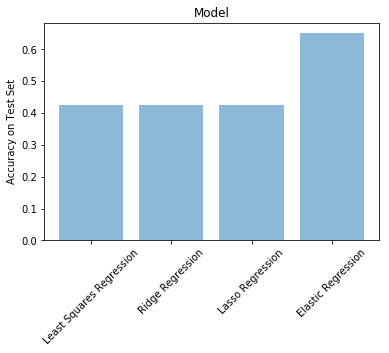

In [103]:
objects = ('Least Squares Regression', 'Ridge Regression', 'Lasso Regression', 'Elastic Regression')
y_pos = np.arange(len(objects))
performance = [mse_1, mse_2, mse_3, mse_4]
plt.bar(y_pos, performance, align='center', alpha=0.5) 
plt.xticks(y_pos, objects)
plt.xticks(rotation= 45)
plt.ylabel('Accuracy on Test Set')
plt.title('Model')

In conclusion, Least Squares Regression, Ridge Regression, and Lasso Regression models received the highest accuracies of 0.4242, 0.4266, and 0.4244 respectively on the test set, for predicting the quality of wine which is a range from 0-10. Thus, these models(after further testing with unseen data) will likely be used in a production environment. We must proceed with caution however, as trends in the factors that wine quality predictions may change over time, so we will need to update the model with new data over time to make these predictions align with the trends. Additionally, investigation into potential model drift over time should be examined, and should be trained with new and updated data.